Apropriate Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt 

Overview Idea: 

Make a data fram of prices for items over timer. Items will be columns headers, days as rows, and entries as average price on day

Import data

In [3]:
df = pd.read_csv('osrs_prices.csv')

First Month: April 2021

In [4]:
items = [2,6,8,10]
prices = pd.DataFrame()
timestamps = False
for i in items:
    filtered_rows = df[df.iloc[:,0] == i]
    filtered_rows = filtered_rows.reset_index(drop=True)
    prices[i] = (filtered_rows.iloc[:729,2]*filtered_rows.iloc[:729,3]+filtered_rows.iloc[:729,4]*filtered_rows.iloc[:729,5])/(filtered_rows.iloc[:729,5]+filtered_rows.iloc[:729,3])


In [5]:
print(prices)

             2              6              8              10
0    151.056084  181886.100649  183487.357973  183989.901740
1    151.877208  182542.004751  183304.318290  183936.733333
2    150.138041  183508.741104  183342.458763  184380.464508
3    148.289139  183172.213592  183206.861818  186572.785950
4    147.114972  183030.525843  183135.580683  183583.262864
..          ...            ...            ...            ...
724  161.764086  186852.312775  185918.044150  185378.878788
725  161.708041  187532.748515  186590.887967  188069.642715
726  163.180155  186646.311258  186535.141962  185972.872483
727  163.054553  204701.872865  187009.406393  380056.633333
728  162.583156  186313.505747  185761.484064  225794.944751

[729 rows x 4 columns]


In [6]:
returns_portfolio = prices.pct_change()

In [7]:
print(returns_portfolio)

           2         6         8         10
0         NaN       NaN       NaN       NaN
1    0.005436  0.003606 -0.000998 -0.000289
2   -0.011451  0.005296  0.000208  0.002412
3   -0.012315 -0.001834 -0.000740  0.011890
4   -0.007918 -0.000774 -0.000389 -0.016023
..        ...       ...       ...       ...
724  0.001199  0.004259 -0.000239 -0.007256
725 -0.000346  0.003642  0.003619  0.014515
726  0.009104 -0.004727 -0.000299 -0.011149
727 -0.000770  0.096737  0.002542  1.043613
728 -0.002891 -0.089830 -0.006673 -0.405891

[729 rows x 4 columns]


In [8]:
variance_matrix = returns_portfolio.cov()*365

In [13]:
pot_returns = []
pot_risk = []
pot_weights = []

num_assets = len(prices.columns)
num_portfolios = 100000

individual_returns = prices.pct_change().mean()
individual_returns

2     0.000401
6     0.000355
8     0.000315
10    0.001154
dtype: float64

In [14]:
for i in range(num_portfolios):
    randomweights = np.random.random(4)
    randomweights = randomweights/ randomweights.sum()
    pot_weights.append(randomweights)
    returns = np.dot(randomweights, individual_returns)
    pot_returns.append(returns)
    risk = randomweights.transpose() @ variance_matrix @ randomweights
    risk = np.sqrt(risk)
    pot_risk.append(risk)

In [15]:
data = {'Retruns':pot_returns, 'Risks': pot_risk}

for counter, symbol in enumerate(prices.columns.to_list()):
    data[str(symbol),'weight'] = [w[counter] for w in pot_weights]

portfolios_v1 = pd.DataFrame(data)
portfolios_v1.head()

,Retruns,Risks,"(2, weight)","(6, weight)","(8, weight)","(10, weight)"
0,0.000665,0.426239,0.124420,0.189732,0.290105,0.395743
1,0.000392,0.341204,0.072570,0.558907,0.310613,0.057910
2,0.000442,0.292348,0.380701,0.175914,0.338877,0.104509
3,0.000564,0.347396,0.251060,0.107062,0.375274,0.266603
4,0.000681,0.479837,0.030263,0.479258,0.080029,0.410449


<Axes: xlabel='Risks', ylabel='Retruns'>

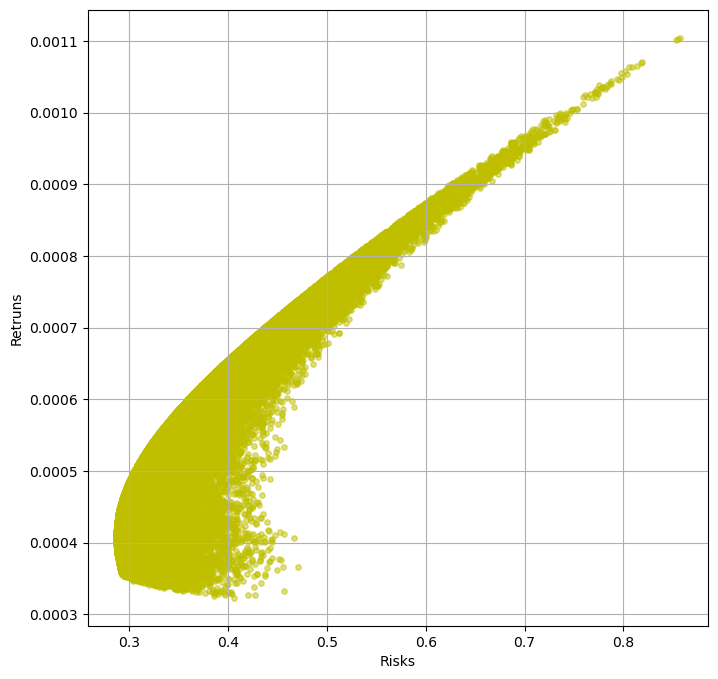

In [16]:
portfolios_v1.plot.scatter(x = 'Risks', y = 'Retruns', marker = 'o', color = 'y', s = 15, alpha = 0.5, grid = True, figsize = [8,8])